# Figure 1 plots
This notebook uses `seaborn` to visualize the data found in figure 1. 


In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 
1. The first cell calls `pwd`, which returns the current working directory that the code is working in. 
2. The second cell calls `ls`, which returns the list of files in the current directory.
3. The third cell sets the home directory to a variable, and sets the figure directory to another one.  

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/Figure1'

In [3]:
ls

FIG1.ipynb                       ~$2024-12-03 Fig1 metadata.xlsx
Fig1 data.xlsx                   ~$Fig1 metadata.xlsx
readme.md


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/Figure1' # home directory
#figs_dir = home_dir + '/figs/' # enable and make folder if figures are to be saved
#data_dir = home_dir + '/data/' # directory holding the data
#outs_dir = home_dir + '/output/' # directory to save any output csv files to 

## Calling in the data
- This script calls in the file called "2024-06-05 data for plots.xlsx". This data is comprised of manually selected values from the metadata master file, which is titled "2024-12-03 Fig1 metadata.xlsx".
- This manually created dataframe has the columns `Genotype`, `phase`, `AC/Cyto Ratio`, and `AC/BC Ratio`, which will be used for plotting.
- This cell calls in the data and asigns it to the variable `data` and prints the first 5 rows using `.head(5)`. 

In [5]:
# reading in data
os.chdir(home_dir)
data = pd.read_excel('Fig1 data.xlsx', 
                     sheet_name = 'organized data Fig 1C, D, F, H')
data.head(5)

,file name,Genotype,phase,AC/Cyto Ratio,AC/BC Ratio
0,2022-01-19_PP4-GFP_GFP-negative_but-again_2_Ca...,"PP4KO, 5X-PP4 control",interphase,1.750000,NaN
1,2022-01-19_PP4-GFP_GFP-negative_but-again_2_Ca...,"PP4KO, 5X-PP4 control",interphase,1.691358,NaN
2,2022-01-19_PP4-GFP_GFP-negative_but-again_2_Ca...,"PP4KO, 5X-PP4 control",interphase,1.161290,NaN
3,2022-01-19_PP4-GFP_GFP-negative_but-again_2_Ca...,"PP4KO, 5X-PP4 control",interphase,1.651685,NaN
4,2022-01-19_PP4-GFP_GFP-negative_but-again_2_Ca...,"PP4KO, 5X-PP4 control",interphase,1.457447,NaN


## Plotting the data: Figure 1D, AC/Cytoplasm. 
- This cell takes the data in `data` and plots it using `seaborn`.
- The first couple lines set the parameters for the axes and title sizes, and the palette being used.
- The plot is made by first using `sns.stripplot()` to make a scatterplot of the data, and then a boxplot is overlayed on the data using `sns.boxplot()`.
- An unpaired student's T-test is done using the function made at the head of this notebook, and annotations are done to the plot to show the p-value for comparisons between `WT` and `PP4KO`.
- The resulting figure is then saved to the home directory.
- The figure was then further edited in Adobe Illustrator for stylistic preferences. 

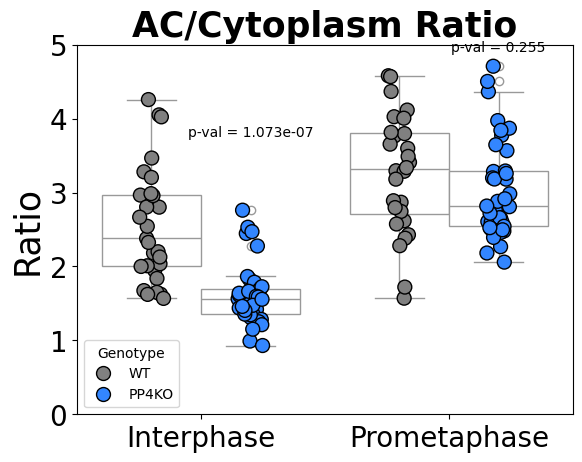

In [6]:
# plotting

p = ['grey', '#3386FF'] # sets palette
axes_title = 25 # axes title size
tick_size = 20 # axes tick size
title = 'AC/Cytoplasm Ratio' # graph title
title_size = 25 # graph title size

# generates stripplot
sns.stripplot(data = data, x = 'phase', y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['WT', 'PP4KO'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

# generates boxplots
sns.boxplot(data = data, x = 'phase', y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['WT', 'PP4KO'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('') # removes x axis label
plt.ylabel('Ratio', fontsize = axes_title) # modifies y axis label
plt.xticks(labels = ['Interphase', 'Prometaphase'], ticks = [0,1], size = tick_size) # manually changes x-tick titles
plt.yticks(size = tick_size) # sets y-tick size to match assigned value
plt.ylim(0,5) # sets y-axis limit
plt.title(title, fontsize = title_size, fontweight = 'bold') # sets title parameters

#stats and annotations
param1 = data[(data['Genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto Ratio'].dropna()
param2 = data[(data['Genotype']=='PP4KO') & (data['phase']=='interphase')]['AC/Cyto Ratio'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 10)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+1), ha = 'center')

param3 = data[(data['Genotype']=='WT') & (data['phase']=='prometaphase')]['AC/Cyto Ratio'].dropna()
param4 = data[(data['Genotype']=='PP4KO') & (data['phase']=='prometaphase')]['AC/Cyto Ratio'].dropna()
x = np.round(independent_ttest(param3, param4, 0.05)[3], decimals = 3)
plt.annotate(f"p-val = {x}", xy = (1.2, param4.max()+0.2), ha = 'center')

# saving figure
#os.chdir(figs_dir)
#plt.savefig('AC-Cytoplasm Ratio, WT and PP4KO.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('AC-Cytoplasm Ratio, WT and PP4KO.svg', dpi = 600, bbox_inches = 'tight')
plt.show(); # shows figure in notebook

## Plotting the data: Figure 1C, AC/BC. 

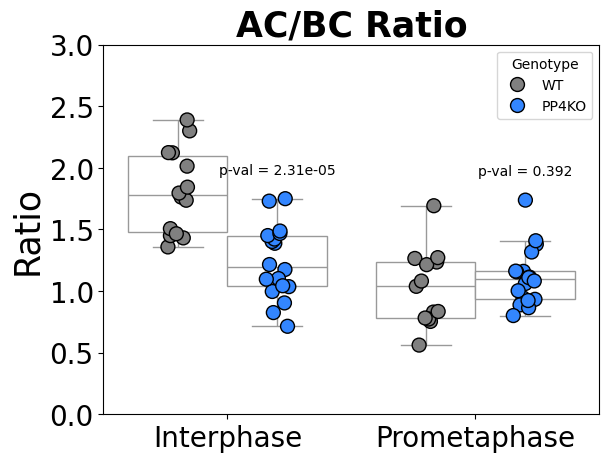

In [7]:
# plotting

p = ['grey', '#3386FF'] 
axes_title = 25
tick_size = 20
title = 'AC/BC Ratio'
title_size = 25

sns.stripplot(data = data, x = 'phase', y = 'AC/BC Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['WT', 'PP4KO'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/BC Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['WT', 'PP4KO'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('')
plt.ylabel('Ratio', fontsize = axes_title)
plt.xticks(labels = ['Interphase', 'Prometaphase'], ticks = [0,1], size = tick_size)
plt.yticks(size = tick_size)
plt.ylim(0,3)
plt.title(title, fontsize = title_size, fontweight = 'bold')

#stats
param1 = data[(data['Genotype']=='WT') & (data['phase']=='interphase')]['AC/BC Ratio'].dropna()
param2 = data[(data['Genotype']=='PP4KO') & (data['phase']=='interphase')]['AC/BC Ratio'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 7)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+0.2), ha = 'center')

param3 = data[(data['Genotype']=='WT') & (data['phase']=='prometaphase')]['AC/BC Ratio'].dropna()
param4 = data[(data['Genotype']=='PP4KO') & (data['phase']=='prometaphase')]['AC/BC Ratio'].dropna()
x = np.round(independent_ttest(param3, param4, 0.05)[3], decimals = 3)
plt.annotate(f"p-val = {x}", xy = (1.2, param4.max()+0.2), ha = 'center')

#os.chdir(figs_dir)
#plt.savefig('AC-BC Ratio, WT and PP4KO.png', dpi = 600, bbox_inches = 'tight')
plt.savefig('AC-BC Ratio, WT and PP4KO.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

## Plotting the data: Figure 1F, AC/Cytoplasm in 5X-UAS-PP4::GFP rescue. 
- `-` denotes animals that did not inherit the rescue construct, and are effectively _Pp4_ mutants.
- `+` denotes _Pp4_ animals that did inherit the rescue construct. 

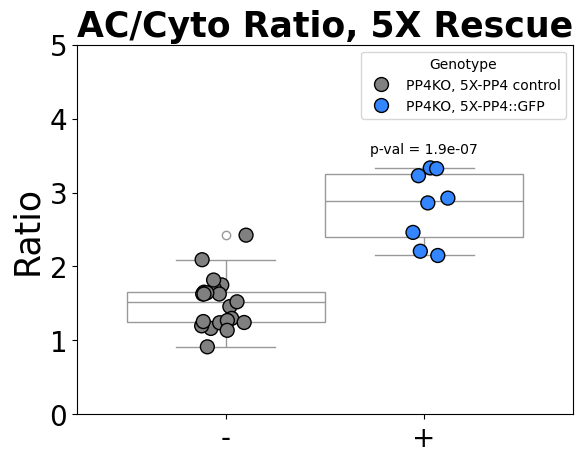

In [8]:
# plotting

p = ['grey', '#3386FF'] 
axes_title = 25
tick_size = 20
title = 'AC/Cyto Ratio, 5X Rescue'
title_size = 25

sns.stripplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 5X-PP4 control', 'PP4KO, 5X-PP4::GFP'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

sns.boxplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 5X-PP4 control', 'PP4KO, 5X-PP4::GFP'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('')
plt.ylabel('Ratio', fontsize = axes_title)
plt.xticks(labels = ['-', '+'], ticks = [-0.2,0.2], size = tick_size, ha = 'center')
plt.yticks(size = tick_size)
plt.ylim(0,5)
plt.title(title, fontsize = title_size, fontweight = 'bold')

#stats
param1 = data[(data['Genotype']=='PP4KO, 5X-PP4 control')]['AC/Cyto Ratio'].dropna()
param2 = data[(data['Genotype']=='PP4KO, 5X-PP4::GFP')]['AC/Cyto Ratio'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 8)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+0.2), ha = 'center')

#os.chdir(figs_dir)
#plt.savefig('AC-Cytoplasm Ratio, 5X rescue.png', dpi = 600, bbox_inches = 'tight')
#plt.savefig('AC-Cytoplasm Ratio, 5X rescue.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

## Plotting the data: Figure 1H, AC/Cytoplasm, 10X-UAS-PP4-dead::GFP rescue.  
- `-` denotes animals that did not inherit the rescue construct, and are effectively _Pp4_ mutants.
- `+` denotes _Pp4_ animals that did inherit the rescue construct. 

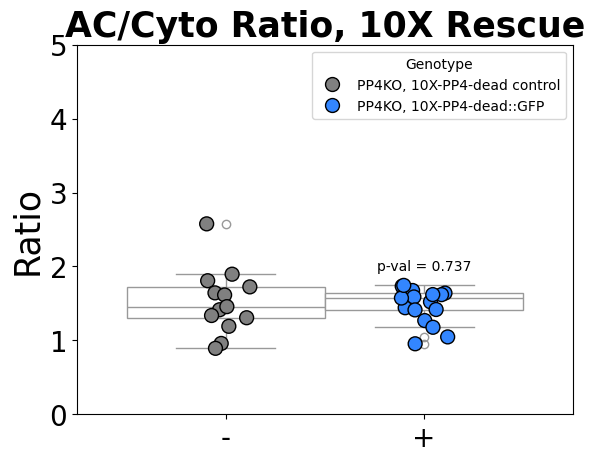

In [9]:
# plotting

p = ['grey', '#3386FF'] 
axes_title = 25
tick_size = 20
title = 'AC/Cyto Ratio, 10X Rescue'
title_size = 25

sns.stripplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP'], palette = p,
             size = 10, edgecolor = 'k', linewidth = 1,
             legend = True)

sns.boxplot(data = data, y = 'AC/Cyto Ratio',
             hue = 'Genotype', dodge = True,
             hue_order = ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP'], palette = ['w', 'w'], 
           legend = False)

plt.xlabel('')
plt.ylabel('Ratio', fontsize = axes_title)
plt.xticks(labels = ['-', '+'], ticks = [-0.2,0.2], size = tick_size, ha = 'center')
plt.yticks(size = tick_size)
plt.ylim(0,5)
plt.title(title, fontsize = title_size, fontweight = 'bold')

#stats
param1 = data[(data['Genotype']=='PP4KO, 10X-PP4-dead control')]['AC/Cyto Ratio'].dropna()
param2 = data[(data['Genotype']=='PP4KO, 10X-PP4-dead::GFP')]['AC/Cyto Ratio'].dropna()
w = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p-val = {w}", xy = (0.2, param2.max()+0.2), ha = 'center')

#os.chdir(figs_dir)
#plt.savefig('AC-Cytoplasm Ratio, 10X rescue.png', dpi = 600, bbox_inches = 'tight')
#plt.savefig('AC-Cytoplasm Ratio, 10X rescue.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

# Stats Table

In [10]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Set up the stats table
stats_table = pd.DataFrame(columns=['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                    'control n', 'experimental n',
                                    'control mean', 'experimental mean',
                                    'control stdev', 'experimental stdev',
                                    'test statistic', 'degrees of freedom', 
                                    'critical value', 'p-value', 'significance'])

pd.set_option('display.float_format', '{:.2E}'.format)  # Scientific notation for p-values

# List of tests to iterate through
tests = [
    ['WT', 'PP4KO', 'interphase', 'AC/Cyto Ratio'],
    ['WT', 'PP4KO', 'prometaphase', 'AC/Cyto Ratio'],
    ['WT', 'PP4KO', 'interphase', 'AC/BC Ratio'],
    ['WT', 'PP4KO', 'prometaphase', 'AC/BC Ratio'],
    ['PP4KO, 5X-PP4 control', 'PP4KO, 5X-PP4::GFP', 'interphase', 'AC/Cyto Ratio'],
    ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP', 'interphase', 'AC/Cyto Ratio'],
    ['PP4KO, 10X-PP4-dead control', 'PP4KO, 10X-PP4-dead::GFP, 2X MTOC', 'interphase', 'AC/Cyto Ratio'],
    ['PP4KO, 10X-PP4-dead::GFP, control 18C', 'PP4KO, 10X-PP4-dead::GFP, 18C', 'interphase', 'AC/Cyto Ratio']
]

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['Genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['Genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('FIG1 intensity stats.csv')
os.chdir(home_dir)

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,PP4KO,interphase,Mann-Whitney U Test,AC/Cyto Ratio,29,37,2.55E+00,1.61E+00,7.66E-01,4.16E-01,9.58E+02,N/A,N/A,5.35187e-08,****
1,WT,PP4KO,prometaphase,Mann-Whitney U Test,AC/Cyto Ratio,28,37,3.26E+00,3.04E+00,7.95E-01,6.66E-01,6.27E+02,N/A,N/A,1.50613e-01,ns
2,WT,PP4KO,interphase,Unpaired Student's T-test,AC/BC Ratio,14,18,1.81E+00,1.23E+00,3.41E-01,2.95E-01,5.10E+00,30,N/A,1.77843e-05,****
3,WT,PP4KO,prometaphase,Unpaired Student's T-test,AC/BC Ratio,13,18,1.03E+00,1.11E+00,3.07E-01,2.33E-01,-9.10E-01,29,N/A,3.70446e-01,ns
4,"PP4KO, 5X-PP4 control","PP4KO, 5X-PP4::GFP",interphase,Unpaired Student's T-test,AC/Cyto Ratio,21,8,1.51E+00,2.81E+00,3.51E-01,4.86E-01,-8.03E+00,27,N/A,1.24200e-08,****
5,"PP4KO, 10X-PP4-dead control","PP4KO, 10X-PP4-dead::GFP",interphase,Mann-Whitney U Test,AC/Cyto Ratio,13,17,1.52E+00,1.48E+00,4.39E-01,2.40E-01,1.13E+02,N/A,N/A,9.33292e-01,ns
6,"PP4KO, 10X-PP4-dead control","PP4KO, 10X-PP4-dead::GFP, 2X MTOC",interphase,Unpaired Student's T-test,AC/Cyto Ratio,13,7,1.52E+00,2.59E+00,4.39E-01,6.67E-01,-4.31E+00,18,N/A,4.20055e-04,***
7,"PP4KO, 10X-PP4-dead::GFP, control 18C","PP4KO, 10X-PP4-dead::GFP, 18C",interphase,Mann-Whitney U Test,AC/Cyto Ratio,12,12,1.34E+00,1.45E+00,3.89E-01,2.76E-01,5.80E+01,N/A,N/A,4.35731e-01,ns


# Centrosome Angle
- This code visualizes the data generated by measuring the angle of displacement between a centrosome's position in interphase and its position in metaphase.
    - This was done using the `imaris point` tool, which allows for the measurement of the angle between 3 points, where point 1 is the centrosome position in interphase, position 2 is the reference point (middle of the cell), and point 3 is the centrosome position in metaphase.
    - These values were manually recorded from Imaris into an excel spreadsheet, which is then fed into this code for visualization.
    - The first plot generated is a `seaborn` plot that visualizes the data as a combination of a `stripplot` and `boxplot`, and the second plot generated uses `matplotlib` to generate radial plots.
- The last cell prints out the results of the stat tests between WT and PP4KO comparisons.  

In [12]:
os.chdir(home_dir)
df = pd.read_excel('Fig1 data.xlsx', 
                     sheet_name = 'CS angle Fig 1I, 1J, 1K')
df.head(5)

,image,genotype,nb number,CS,angle
0,WT-Asl-Nb1,WT,1,AC,3.95E+01
1,WT-Asl-Nb2,WT,2,AC,3.60E+01
2,WT-Asl-Nb3,WT,3,AC,3.69E+01
3,WT-Asl-Nb4,WT,4,AC,2.86E+01
4,WT-Asl-Nb5,WT,5,AC,6.65E+01


# Plotting

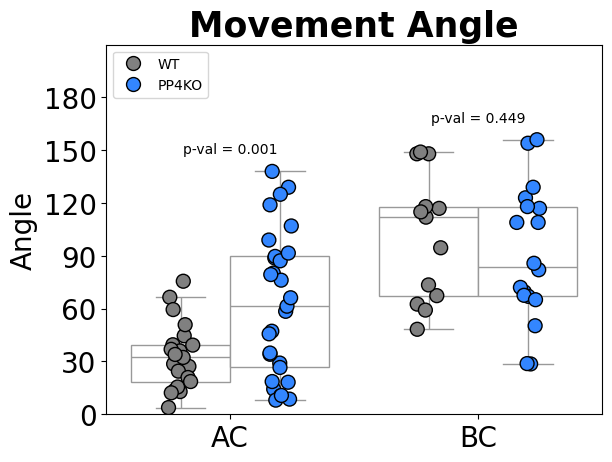

In [13]:
### --- Plotting --- ###
p = ['grey', '#3386FF' ] # classic blue and orange from the rotation saga
sns.stripplot(hue = 'genotype', y = 'angle', data = df,
             x = 'CS', dodge = True, palette = p, 
              size = 10, edgecolor = 'k', linewidth = 1, alpha = 1, legend = True)

sns.boxplot(hue = 'genotype', y = 'angle', data = df,
             x = 'CS', dodge = True, palette = ['w', 'w'],
           legend = False)
plt.legend(loc = 'upper left')
plt.ylim(0,210)
plt.xlabel("", fontweight = 'bold', fontsize = 20)
plt.ylabel("Angle", fontsize = 20)
plt.title("Movement Angle", fontsize = 25, fontweight = 'bold')
plt.xticks(['AC', 'BC'], fontsize = 20)
plt.yticks([0, 30, 60, 90, 120, 150, 180], fontsize = 20)

### --- Stats --- ###
param1 = df[(df['CS']=="AC") & (df['genotype']=="WT")]['angle'].dropna()
param2 = df[(df['CS']=="AC") & (df['genotype']=="PP4KO")]['angle'].dropna()
independent_ttest(param1, param2, 0.05)[3]
ac_stat = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)

plt.annotate(f"p-val = {ac_stat}", xy = (0, param2.max()+10), ha = 'center')

param1 = df[(df['CS']=="BC") & (df['genotype']=="WT")]['angle'].dropna()
param2 = df[(df['CS']=="BC") & (df['genotype']=="PP4KO")]['angle'].dropna()
bc_stat = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)

plt.annotate(f"p-val = {bc_stat}", xy = (1, param2.max()+10), ha = 'center')

#os.chdir(figs_dir)
#plt.savefig('centrosome_angle.png', bbox_inches = 'tight', dpi = 900)
#plt.savefig('centrosome_angle.svg', bbox_inches = 'tight', dpi = 900)
plt.show();

## Radial plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


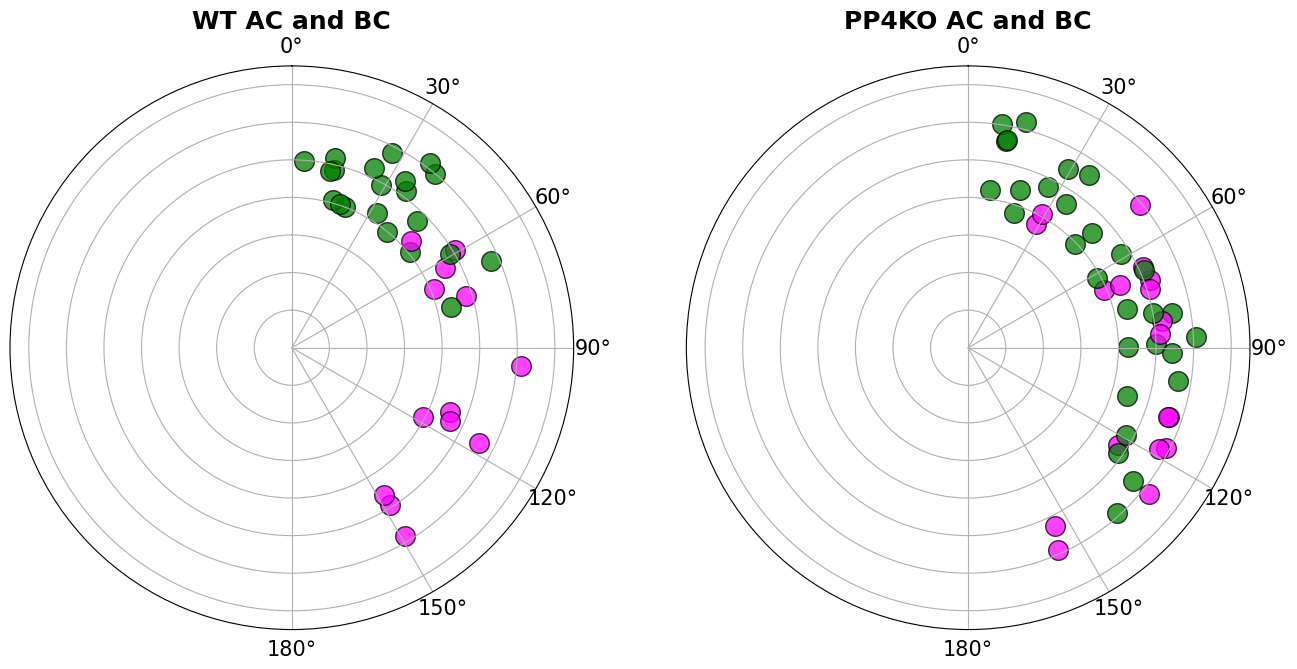

In [14]:
# Add jitter to avoid overlapping points
jitter_strength = 0.25  # Adjust the jitter strength as needed
df['angle_rad'] = np.deg2rad(df['angle'])
df['radius_jittered'] = 1 + np.random.uniform(-jitter_strength, jitter_strength, len(df))

# Define marker shapes and colors
markers = {'WT': 'o', 'PP4KO': 'o'}
palette = {'AC': 'green', 'BC': 'magenta'}

# Create subplots for AC and BC
fig, axs = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'polar': True})

# Function to plot data
def plot_data(ax, cs_value, title):
    subset = df[df['genotype'] == cs_value]
    for _, row in subset.iterrows():
        ax.scatter(row['angle_rad'], row['radius_jittered'],
                   color=palette[row['CS']],
                   marker=markers[cs_value],
                   s=200,  # Size of markers
                   edgecolor='k', linewidth=1, alpha = 0.75)
    ax.set_ylim(0, 1.5)  # Adjust the radius limits if necessary
    ax.set_theta_zero_location('N')  # Set the 0 direction to the top
    ax.set_theta_direction(-1)  # Set the direction of theta to clockwise
    ax.set_thetagrids([])  # Turn off the theta grid lines
    ax.set_yticklabels([])  # Turn off the radial grid lines
    ax.set_xticks(np.linspace(0, np.pi, 7))  # Set theta ticks to 0 to 180 degrees
    ax.set_xticklabels(['0°', '30°', '60°', '90°', '120°', '150°', '180°'])  # Custom labels for half-circle
    ax.set_title(title, fontsize = 18, fontweight = 'bold')
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.legend().set_visible(False)  # Turn off the legend
    
    # Overlay a white patch to hide the unwanted half-circle
    ax.fill_between(np.linspace(np.pi, 2*np.pi, 100), 0, 1.5, color='white')

# Plot for AC
plot_data(axs[0], 'WT', 'WT AC and BC')

# Plot for BC
plot_data(axs[1], 'PP4KO', 'PP4KO AC and BC')

# Display the plot

#os.chdir(figs_dir)
#plt.savefig('radial_centrosome_angle_alt.png', bbox_inches = 'tight', dpi = 900)
#plt.savefig('radial_centrosome_angle_alt.svg', bbox_inches = 'tight', dpi = 900)
plt.show();

# Angle stats

In [15]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'centrosome', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,centrosome,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [16]:
df.head(5)

,image,genotype,nb number,CS,angle,angle_rad,radius_jittered
0,WT-Asl-Nb1,WT,1,AC,3.95E+01,6.89E-01,1.20E+00
1,WT-Asl-Nb2,WT,2,AC,3.60E+01,6.28E-01,1.03E+00
2,WT-Asl-Nb3,WT,3,AC,3.69E+01,6.44E-01,1.23E+00
3,WT-Asl-Nb4,WT,4,AC,2.86E+01,4.99E-01,9.88E-01
4,WT-Asl-Nb5,WT,5,AC,6.65E+01,1.16E+00,1.16E+00


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Set up the stats table
stats_table = pd.DataFrame(columns=['control variable', 'experimental variable', 'centrosome', 'test', 'y-value',
                                    'control n', 'experimental n',
                                    'control mean', 'experimental mean',
                                    'control stdev', 'experimental stdev',
                                    'test statistic', 'degrees of freedom', 
                                    'critical value', 'p-value', 'significance'])

pd.set_option('display.float_format', '{:.2E}'.format)  # Scientific notation for p-values

# List of tests to iterate through
t1 = ['WT', 'PP4KO', 'AC', 'angle']
t2 = ['WT', 'PP4KO', 'BC', 'angle']

tests = [t1, t2]
data = df

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var) & (data['CS'] == phase)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var) & (data['CS'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'centrosome'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('FIG1 angle stats.csv')
os.chdir(home_dir)

,control variable,experimental variable,centrosome,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,PP4KO,AC,Mann-Whitney U Test,angle,21,29,3.30E+01,6.22E+01,1.88E+01,4.06E+01,1.86E+02,N/A,N/A,1.98431e-02,*
1,WT,PP4KO,BC,Unpaired Student's T-test,angle,13,18,1.01E+02,9.07E+01,3.60E+01,3.82E+01,7.59E-01,29,N/A,4.53895e-01,ns
